# Boilerplate

In [8]:
%load_ext autoreload
#Now, you can turn on auto-reloading
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
path="/content/assignment_1"
import json
import io
import os
import sys
sys.path.append(path)

#Reading JSON File

In [10]:
#this will locate all the JSON files inside the main Directory and any sub-Folder:
json_files = [os.path.join(root, name)
             for root, dirs, files in os.walk(path)
             for name in files
             if name.endswith((".json"))] #If we needed to read several files extensions: if name.endswith((".ext1", ".ext2"))

print('Number of JSON files ready to be loaded: ' + str(len(json_files)))

Number of JSON files ready to be loaded: 1


In [11]:
json_files

['/content/assignment_1/tvshows.json']

In [12]:
print('Path to the first file: '+json_files[0])

Path to the first file: /content/assignment_1/tvshows.json


In [13]:
#Open the file using the name of the json file witn open() function
#Read the json file using load() and put the json data into a variable.
with open(json_files[0]) as f:
   json_data = json.load(f)


# Assignment


In [110]:
# Imports
from actor_class import Actor
from actorgraph_class import ActorGraph
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import networkx as nx


# Constants
SHOWCOUNT = 8
ACTORCOUNT = 5

In [111]:
data_shows = []
for show in json_data[:SHOWCOUNT]:
  data_show={}
  data_show['id']=show['id']
  data_show['name']=show['name']
  data_show['premiered']=show['premiered']
  data_show['cast']=show['cast']
  data_shows.append(data_show)
data_shows

[{'id': 139,
  'name': 'Girls',
  'premiered': '2012-04-15',
  'cast': [{'person': {'id': 27410,
     'url': 'http://www.tvmaze.com/people/27410/lena-dunham',
     'name': 'Lena Dunham',
     'country': {'name': 'United States',
      'code': 'US',
      'timezone': 'America/New_York'},
     'birthday': '1986-05-13',
     'deathday': None,
     'gender': 'Female',
     'image': {'medium': 'http://static.tvmaze.com/uploads/images/medium_portrait/3/7597.jpg',
      'original': 'http://static.tvmaze.com/uploads/images/original_untouched/3/7597.jpg'}},
    'character': {'id': 36886,
     'url': 'http://www.tvmaze.com/characters/36886/girls-hannah-horvath',
     'name': 'Hannah Horvath',
     'image': {'medium': 'http://static.tvmaze.com/uploads/images/medium_portrait/0/1954.jpg',
      'original': 'http://static.tvmaze.com/uploads/images/original_untouched/0/1954.jpg'}},
    'self': False,
    'voice': False},
   {'person': {'id': 11102,
     'url': 'http://www.tvmaze.com/people/11102/alli

In [112]:
actorGraph = ActorGraph(data_shows)
actorGraph.buildRelations()

In [113]:
# Generate a list of the top 5 actors
topActors = []
for actor in actorGraph:
    if len(topActors) < ACTORCOUNT:
        topActors.append(actor)
    else:
        for topActor in topActors:
            if actor.influence > topActor.influence:
                topActors.remove(topActor)
                topActors.append(actor)
                break

In [114]:
visualisationData={}
legendData=[]
for actor in topActors:
  print(actor)
  print(f"Influence: {actor.influence}")
  visualisationData[actor.id]=actor.influence
  legendData.append(actor.name)

The actor 24858 has a name Adam Driver and birthday 1983-11-19
Influence: 1.0
The actor 39169 has a name Tom Kane and birthday 1962-04-15
Influence: 1.3333333333333333
The actor 60713 has a name Roger Jackson and birthday 1956-08-29
Influence: 1.3333333333333333
The actor 27118 has a name Tom Kenny and birthday 1962-07-13
Influence: 1.3333333333333333
The actor 28821 has a name Jennifer Hale and birthday 1972-01-30
Influence: 1.3333333333333333


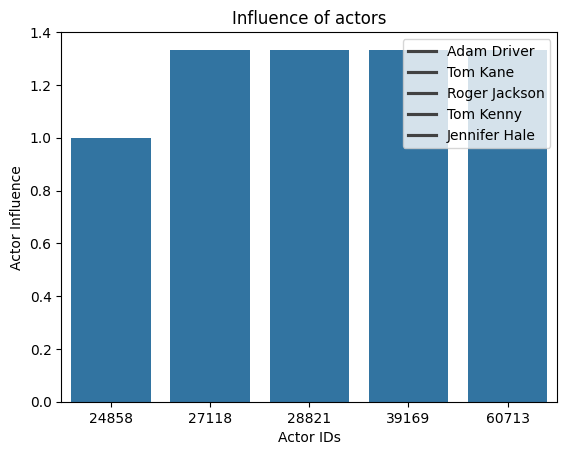

In [115]:
#Configure your x and y values from the dictionary:
x= list(visualisationData.keys())
y=list(visualisationData.values())

#Create the graph = create seaborn barplot
ax=sns.barplot(x=x,y=y)

#specfiy axis labels
ax.legend(legendData)
ax.set(xlabel='Actor IDs',
       ylabel='Actor Influence',
       title='Influence of actors')

#display barplot
plt.show()

In [129]:
# Build Graph
g = nx.Graph()
for actor in topActors:
    g.add_node(actor.id, name=actor.name)
    for x, y in actor.relations.items():
        for other in topActors:
            if other.id == x:
                g.add_edge(actor.id, x, weight=y)

In [130]:
# Set Edge Colours
weights = nx.get_edge_attributes(g,'weight').values()
colors_dict={1:'c',2:'g',3:'r'}
def get_color(weight):
  return colors_dict[weight]
colors = map(get_color, list(weights))
c=list(colors)
c

['g', 'g', 'g', 'g', 'g', 'g']

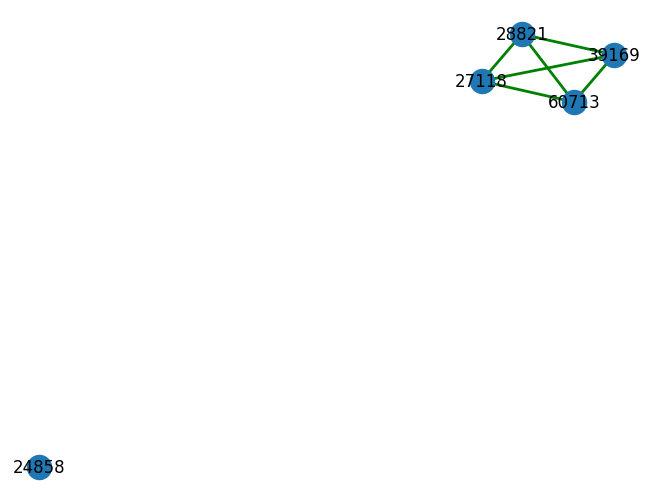

In [131]:
nx.draw(g,with_labels = True, width=list(weights),edge_color=c)
plt.show()

In [132]:
visualisationData

{24858: 1.0,
 39169: 1.3333333333333333,
 60713: 1.3333333333333333,
 27118: 1.3333333333333333,
 28821: 1.3333333333333333}

In [133]:
# Set Node Colours
def get_node_color(strength):
  if strength>=2:
    return 'r'
  elif strength>=1.1:
    return 'g'
  else:
    return 'c'
nodes_colors = map(get_node_color, visualisationData.values())
nc=list(nodes_colors )
nc

['c', 'g', 'g', 'g', 'g']

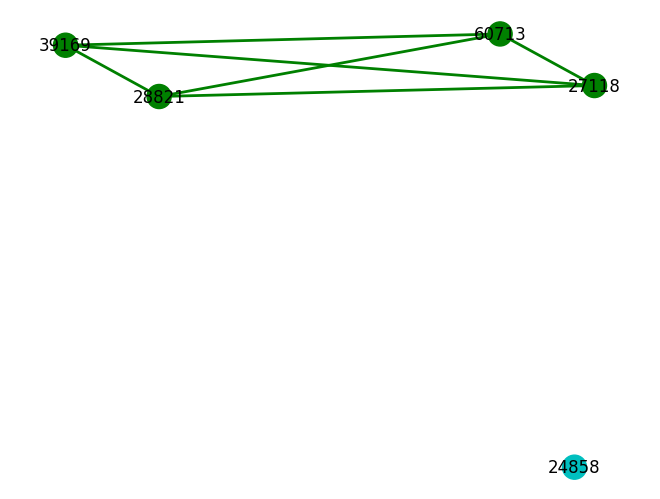

In [134]:
nx.draw(g,with_labels = True, width=list(weights),edge_color=c, node_color=nc)
plt.show()